## Obdeleva in procesiranje podatkov

Metode podatkovnega inzeniringa:

- Zapolnitev manjkajocih vrednosti

- Popravljanje izkrivljenih podatkov

- Ustvarjanje znacilnic

- Izbira znacilnic

- Standardizacija/normalizacija vrednosti

In [37]:
import pandas as pd
import numpy as np

# Branje datoteke
df = pd.read_excel('data.xlsx', index_col='time')
df.head()

,Unnamed: 0,mean T,min T,max T,mean rel. hum.,min rel. hum.,max rel. hum.,T,rel. hum.,precipitation,wind speed,wind direction,max gust,global energy,diffusive energy
time,,,,,,,,,,,,,,,
2017-01-01 00:00:00,190769,-2.7,-2.9,-2.6,66.0,66.0,67.0,-2.7,66.0,0.0,1.9,317.0,3.9,0.0,0.0
2017-01-01 00:10:00,211425,-2.7,-2.9,-2.5,66.0,65.0,67.0,-2.8,65.0,NaN,2.1,316.0,4.9,NaN,NaN
2017-01-01 00:20:00,177233,-2.9,-3.1,-2.7,66.0,65.0,68.0,-3.0,67.0,NaN,2.6,317.0,4.7,NaN,NaN
2017-01-01 00:30:00,14632,-3.2,-3.4,-2.8,68.0,66.0,69.0,-3.0,66.0,0.0,3.0,312.0,5.5,0.0,0.0
2017-01-01 00:40:00,2576,-2.8,-3.1,-2.7,66.0,65.0,68.0,-3.0,67.0,NaN,3.0,312.0,4.8,NaN,NaN


In [38]:
# Dropanje neuporabnega stolpca
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,mean T,min T,max T,mean rel. hum.,min rel. hum.,max rel. hum.,T,rel. hum.,precipitation,wind speed,wind direction,max gust,global energy,diffusive energy
time,,,,,,,,,,,,,,
2017-01-01 00:00:00,-2.7,-2.9,-2.6,66.0,66.0,67.0,-2.7,66.0,0.0,1.9,317.0,3.9,0.0,0.0
2017-01-01 00:10:00,-2.7,-2.9,-2.5,66.0,65.0,67.0,-2.8,65.0,NaN,2.1,316.0,4.9,NaN,NaN
2017-01-01 00:20:00,-2.9,-3.1,-2.7,66.0,65.0,68.0,-3.0,67.0,NaN,2.6,317.0,4.7,NaN,NaN
2017-01-01 00:30:00,-3.2,-3.4,-2.8,68.0,66.0,69.0,-3.0,66.0,0.0,3.0,312.0,5.5,0.0,0.0
2017-01-01 00:40:00,-2.8,-3.1,-2.7,66.0,65.0,68.0,-3.0,67.0,NaN,3.0,312.0,4.8,NaN,NaN


In [27]:
# Sortiranje glede na cas
df.sort_values(by='time', inplace=True)
df.head()

,mean T,min T,max T,mean rel. hum.,min rel. hum.,max rel. hum.,T,rel. hum.,precipitation,wind speed,wind direction,max gust,global energy,diffusive energy
time,,,,,,,,,,,,,,
2017-01-01 00:00:00,-2.7,-2.9,-2.6,66.0,66.0,67.0,-2.7,66.0,0.0,1.9,317.0,3.9,0.0,0.0
2017-01-01 00:10:00,-2.7,-2.9,-2.5,66.0,65.0,67.0,-2.8,65.0,NaN,2.1,316.0,4.9,NaN,NaN
2017-01-01 00:20:00,-2.9,-3.1,-2.7,66.0,65.0,68.0,-3.0,67.0,NaN,2.6,317.0,4.7,NaN,NaN
2017-01-01 00:30:00,-3.2,-3.4,-2.8,68.0,66.0,69.0,-3.0,66.0,0.0,3.0,312.0,5.5,0.0,0.0
2017-01-01 00:40:00,-2.8,-3.1,-2.7,66.0,65.0,68.0,-3.0,67.0,NaN,3.0,312.0,4.8,NaN,NaN


In [50]:
# Zapolnjevanje manjkajocih vrednosti
print(df.isnull().sum())
df = df.interpolate(method='linear')
df.head()

mean T                   0
min T                    0
max T                    0
mean rel. hum.         720
min rel. hum.          720
max rel. hum.          720
T                        0
rel. hum.              720
precipitation       207360
wind speed            1186
wind direction        1038
max gust              1041
global energy       207551
diffusive energy    207543
dtype: int64


,mean T,min T,max T,mean rel. hum.,min rel. hum.,max rel. hum.,T,rel. hum.,precipitation,wind speed,wind direction,max gust,global energy,diffusive energy
time,,,,,,,,,,,,,,
2017-01-01 00:00:00,-2.7,-2.9,-2.6,66.0,66.0,67.0,-2.7,66.0,0.0,1.9,317.0,3.9,0.0,0.0
2017-01-01 00:10:00,-2.7,-2.9,-2.5,66.0,65.0,67.0,-2.8,65.0,0.0,2.1,316.0,4.9,0.0,0.0
2017-01-01 00:20:00,-2.9,-3.1,-2.7,66.0,65.0,68.0,-3.0,67.0,0.0,2.6,317.0,4.7,0.0,0.0
2017-01-01 00:30:00,-3.2,-3.4,-2.8,68.0,66.0,69.0,-3.0,66.0,0.0,3.0,312.0,5.5,0.0,0.0
2017-01-01 00:40:00,-2.8,-3.1,-2.7,66.0,65.0,68.0,-3.0,67.0,0.0,3.0,312.0,4.8,0.0,0.0


In [51]:
df.describe()
print(df.isnull().sum())

mean T              0
min T               0
max T               0
mean rel. hum.      0
min rel. hum.       0
max rel. hum.       0
T                   0
rel. hum.           0
precipitation       0
wind speed          0
wind direction      0
max gust            0
global energy       0
diffusive energy    0
dtype: int64


Vse znacilnice izgledjo primerno razen zadnjih dveh stolpcev *global energy* in *diffusive energy*, zato ju bomo zdruzili v skupno znacilnico *energy*.

In [52]:
# Ustvarjanje nove znacilnice
df['energy'] = df[['global energy', 'diffusive energy']].mean(axis=1)
df.drop(columns=['global energy', 'diffusive energy'], inplace=True)

df.head()

,mean T,min T,max T,mean rel. hum.,min rel. hum.,max rel. hum.,T,rel. hum.,precipitation,wind speed,wind direction,max gust,energy
time,,,,,,,,,,,,,
2017-01-01 00:00:00,-2.7,-2.9,-2.6,66.0,66.0,67.0,-2.7,66.0,0.0,1.9,317.0,3.9,0.0
2017-01-01 00:10:00,-2.7,-2.9,-2.5,66.0,65.0,67.0,-2.8,65.0,0.0,2.1,316.0,4.9,0.0
2017-01-01 00:20:00,-2.9,-3.1,-2.7,66.0,65.0,68.0,-3.0,67.0,0.0,2.6,317.0,4.7,0.0
2017-01-01 00:30:00,-3.2,-3.4,-2.8,68.0,66.0,69.0,-3.0,66.0,0.0,3.0,312.0,5.5,0.0
2017-01-01 00:40:00,-2.8,-3.1,-2.7,66.0,65.0,68.0,-3.0,67.0,0.0,3.0,312.0,4.8,0.0


In [53]:
# Skaliranje podatkov

from sklearn.preprocessing import StandardScaler
from joblib import dump

scaler = StandardScaler()

# Nocemo skalirati time in precipitation
stevilski = ['mean T', 'min T', 'max T', 'mean rel. hum.', 'min rel. hum.', 'max rel. hum.', 'T', 'rel. hum.', 'wind speed', 'wind direction', 'max gust', 'energy']
df[stevilski] = scaler.fit_transform(df[stevilski])
df.head()

#shranjevanje scalerja
dump(scaler, "scaler.save")


['scaler.save']

In [54]:
df

,mean T,min T,max T,mean rel. hum.,min rel. hum.,max rel. hum.,T,rel. hum.,precipitation,wind speed,wind direction,max gust,energy
time,,,,,,,,,,,,,
2017-01-01 00:00:00,-1.589699,-1.594809,-1.595427,-0.445035,-0.342519,-0.515628,-1.589571,-0.444483,0.0,-0.063776,0.885403,0.193106,-0.682318
2017-01-01 00:10:00,-1.589699,-1.594809,-1.584103,-0.445035,-0.394474,-0.515628,-1.600923,-0.497725,0.0,0.113507,0.875989,0.693119,-0.682318
2017-01-01 00:20:00,-1.612405,-1.617555,-1.606751,-0.445035,-0.394474,-0.460226,-1.623626,-0.391240,0.0,0.556713,0.885403,0.593116,-0.682318
2017-01-01 00:30:00,-1.646464,-1.651673,-1.618075,-0.338420,-0.342519,-0.404824,-1.623626,-0.444483,0.0,0.911278,0.838335,0.993127,-0.682318
2017-01-01 00:40:00,-1.601052,-1.617555,-1.606751,-0.445035,-0.394474,-0.460226,-1.623626,-0.391240,0.0,0.911278,0.838335,0.643118,-0.682318
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-30 23:10:00,-1.169643,-1.151269,-1.176443,1.207504,1.216135,1.201842,-1.169553,1.206025,0.2,0.733996,0.668892,0.543115,-0.682318
2022-11-30 23:20:00,-1.169643,-1.151269,-1.187767,1.207504,1.216135,1.201842,-1.169553,1.206025,0.2,0.468072,0.659479,-0.006900,-0.682318
2022-11-30 23:30:00,-1.169643,-1.162642,-1.187767,1.207504,1.216135,1.201842,-1.180905,1.259267,0.2,0.733996,0.650065,0.393111,-0.682318


## Izgradnja napovednega modela

In [55]:
# Izbira podatkov

traindf = df.loc[(df.index < '2017-12-01 00:00:00') & (df.index >= '2017-01-01 00:00:00')]
testdf = df.loc[(df.index < '2018-01-01 00:00:00') & (df.index >= '2017-12-01 00:00:00')]

print('dolzina train' , len(traindf))
print('dolzina testne ', len(testdf))

dolzina train 48096
dolzina testne  4464


In [59]:
lookback = 24*6

xtrain = traindf.copy()
xtrain.drop(['precipitation'], axis=1, inplace=True)

temparray = []
for i in range (len(xtrain)-lookback-1):
    a = xtrain.iloc[i:(i+ lookback)]
    temparray.append(a.to_numpy())
    
xtrain = np.array(temparray)
    
ytrain = traindf['precipitation'].copy()
ytrain = ytrain[lookback+1:]
ytrain = ytrain.to_numpy()

print(xtrain.shape)
print(ytrain.shape)

(47951, 144, 12)
(47951,)


In [60]:
xtest = testdf.copy()
xtest.drop(['precipitation'], axis=1, inplace=True)

temparray = []
for i in range (len(xtest)-lookback-1):
    a = xtest.iloc[i:(i+lookback)]
    temparray.append(a.to_numpy())
    
xtest = np.array(temparray)

ytest = testdf['precipitation'].copy()
ytest = ytest[lookback+1:]
ytest = ytest.to_numpy()

print(xtest.shape)
print(ytest.shape)

(4319, 144, 12)
(4319,)


In [61]:
from keras.models import Sequential
from keras.layers import GRU
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()

model.add(GRU(32, input_shape=(lookback, xtrain.shape[2])))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'accuracy'])
model.fit(xtrain, ytrain, epochs=3, batch_size=1, verbose=1)
# mse: 0.0706 - mae: 0.0748 - accuracy: 0.9291
# loss: nan - mse: nan - mae: nan - accuracy: 0.3139


#model.add(LSTM(32, input_shape=(lookback, xtrain.shape[2]), return_sequences=True))
#model.add(LSTM(32, return_sequences=True))
#model.add(LSTM(32))
#model.add(Dense(8, activation="relu"))
#model.add(Dense(1))

# mse: 0.0839 - mae: 0.0778 - accuracy: 0.9276


# model.add(GRU(32, input_shape=(lookback, xtrain.shape[2]), return_sequences=True))
# model.add(GRU(32, return_sequences=True))
# model.add(Dense(8, activation="relu"))
# model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'accuracy'])
#model.fit(xtrain, ytrain, epochs=1, batch_size=1, verbose=1)

# mse: 0.0908 - mae: 0.0798 - accuracy: 0.9299

Epoch 1/3
47951/47951 [==============================] - 673s 14ms/step - loss: 0.0868 - mse: 0.0868 - mae: 0.0766 - accuracy: 0.9271
Epoch 2/3
47951/47951 [==============================] - 717s 15ms/step - loss: 0.0672 - mse: 0.0672 - mae: 0.0581 - accuracy: 0.9283
Epoch 3/3
47951/47951 [==============================] - 724s 15ms/step - loss: 0.0579 - mse: 0.0579 - mae: 0.0512 - accuracy: 0.9298


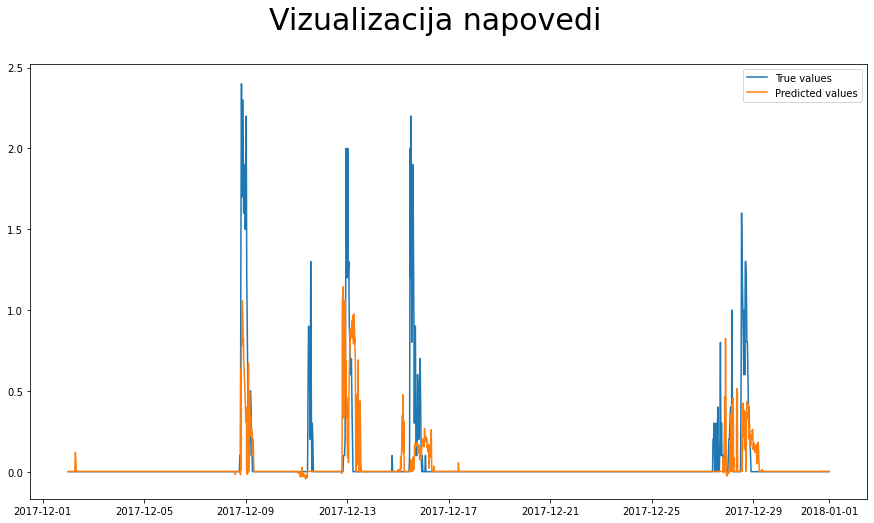

In [66]:
ypred = model.predict(xtest)

import matplotlib.pyplot as plt
plt.figure(figsize=(15,8)).suptitle("Vizualizacija napovedi", fontsize=30)
plt.plot(testdf.index[lookback+1:], ytest, label='True values')
plt.plot(testdf.index[lookback+1:], ypred, label='Predicted values')
plt.legend()
plt.show()

In [67]:
df

,mean T,min T,max T,mean rel. hum.,min rel. hum.,max rel. hum.,T,rel. hum.,precipitation,wind speed,wind direction,max gust,energy
time,,,,,,,,,,,,,
2017-01-01 00:00:00,-1.589699,-1.594809,-1.595427,-0.445035,-0.342519,-0.515628,-1.589571,-0.444483,0.0,-0.063776,0.885403,0.193106,-0.682318
2017-01-01 00:10:00,-1.589699,-1.594809,-1.584103,-0.445035,-0.394474,-0.515628,-1.600923,-0.497725,0.0,0.113507,0.875989,0.693119,-0.682318
2017-01-01 00:20:00,-1.612405,-1.617555,-1.606751,-0.445035,-0.394474,-0.460226,-1.623626,-0.391240,0.0,0.556713,0.885403,0.593116,-0.682318
2017-01-01 00:30:00,-1.646464,-1.651673,-1.618075,-0.338420,-0.342519,-0.404824,-1.623626,-0.444483,0.0,0.911278,0.838335,0.993127,-0.682318
2017-01-01 00:40:00,-1.601052,-1.617555,-1.606751,-0.445035,-0.394474,-0.460226,-1.623626,-0.391240,0.0,0.911278,0.838335,0.643118,-0.682318
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-30 23:10:00,-1.169643,-1.151269,-1.176443,1.207504,1.216135,1.201842,-1.169553,1.206025,0.2,0.733996,0.668892,0.543115,-0.682318
2022-11-30 23:20:00,-1.169643,-1.151269,-1.187767,1.207504,1.216135,1.201842,-1.169553,1.206025,0.2,0.468072,0.659479,-0.006900,-0.682318
2022-11-30 23:30:00,-1.169643,-1.162642,-1.187767,1.207504,1.216135,1.201842,-1.180905,1.259267,0.2,0.733996,0.650065,0.393111,-0.682318


In [68]:
xtrainfull = df.drop(['precipitation'], axis=1)

temparr = []

for i in range (len(xtrainfull)-lookback-1):
    b = xtrainfull.iloc[i:(i+lookback)]
    temparr.append(a.to_numpy())

xtrainfull = np.array(temparr)

ytrainfull = df['precipitation'].copy()
ytrainfull = ytrainfull[lookback+1:]
ytrainfull = ytrainfull.to_numpy()

print(xtrainfull.shape)
print(ytrainfull.shape)

(310895, 144, 12)
(310895,)


In [70]:
fullmodel = Sequential()

fullmodel.add(GRU(32, input_shape=(lookback, xtrain.shape[2])))
fullmodel.add(Dense(8, activation="relu"))
fullmodel.add(Dense(1))

fullmodel.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'accuracy'])
fullmodel.fit(xtrainfull, ytrainfull, epochs=1, batch_size=1, verbose=1)

310895/310895 [==============================] - 4692s 15ms/step - loss: 0.1125 - mse: 0.1125 - mae: 0.0930 - accuracy: 0.9236


In [71]:
fullmodel.summary()
fullmodel.save('model.h5')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 32)                4416      
                                                                 
 dense_18 (Dense)            (None, 8)                 264       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,689
Trainable params: 4,689
Non-trainable params: 0
_________________________________________________________________
